In [2]:
import pandas as pd
import sqlalchemy
import pymysql
import plotly.express as px
from pandas.io import sql
from sqlalchemy import Column, VARCHAR
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine

In [130]:
# I set the username, password and database name as variables
UserName='Your user name'
Password='Your Password'
DatabaseName='Your database'
URL='Your URL'

In [131]:
# Creating the database connection
db_connection_str = "mysql+pymysql://"+UserName+ ":" +Password +"@svc-4884af8f-b8f1-46b0-a9dc-8ebb15dc53d9-dml.aws-virginia-3.svc.singlestore.com/"+ DatabaseName
db_connection = create_engine(db_connection_str)

In [3]:
df_data = pd.read_csv("gapminder_tidy.csv")
df_data

,country,continent,year,metric,value
0,Algeria,Africa,1952,gdpPercap,2.449008e+03
1,Algeria,Africa,1952,lifeExp,4.307700e+01
2,Algeria,Africa,1952,pop,9.279525e+06
3,Algeria,Africa,1957,gdpPercap,3.013976e+03
4,Algeria,Africa,1957,lifeExp,4.568500e+01
...,...,...,...,...,...
5107,New Zealand,Oceania,2002,lifeExp,7.911000e+01
5108,New Zealand,Oceania,2002,pop,3.908037e+06
5109,New Zealand,Oceania,2007,gdpPercap,2.518501e+04
5110,New Zealand,Oceania,2007,lifeExp,8.020400e+01


In [97]:
# Insert whole DataFrame into MySQL
df_data.to_sql('gapminder_tidy', con = db_connection, if_exists = 'append', index = False, chunksize = 1000, dtype ={
    'country': sqlalchemy.types.NVARCHAR(length=255),
    'continent': sqlalchemy.types.NVARCHAR(length=255),
    'year': sqlalchemy.types.INTEGER(),
    'metric': sqlalchemy.types.NVARCHAR(length=255),
    'value': sqlalchemy.types.Float(precision=3, asdecimal=True)})

5112

In [98]:
DataFromDB = pd.read_sql('SELECT * FROM gapminder_tidy', con=db_connection)
DataFromDB

,country,continent,year,metric,value
0,Algeria,Africa,1952,gdpPercap,2449.010
1,Algeria,Africa,1957,gdpPercap,3013.980
2,Algeria,Africa,1957,lifeExp,45.685
3,Algeria,Africa,1962,gdpPercap,2550.820
4,Algeria,Africa,1962,lifeExp,48.303
...,...,...,...,...,...
5107,New Zealand,Oceania,1997,gdpPercap,21050.400
5108,New Zealand,Oceania,2002,lifeExp,79.110
5109,New Zealand,Oceania,2007,gdpPercap,25185.000
5110,New Zealand,Oceania,2007,lifeExp,80.204


In [108]:
df_gdp_oceania = DataFromDB.query("continent=='Oceania' & metric=='gdpPercap'").sort_values(['country','year'],ascending = [True, True])
df_gdp_oceania

,country,continent,year,metric,value
5014,Australia,Oceania,1952,gdpPercap,10039.6
5016,Australia,Oceania,1957,gdpPercap,10949.6
5019,Australia,Oceania,1962,gdpPercap,12217.2
5079,Australia,Oceania,1967,gdpPercap,14526.1
5081,Australia,Oceania,1972,gdpPercap,16788.6
5024,Australia,Oceania,1977,gdpPercap,18334.2
5083,Australia,Oceania,1982,gdpPercap,19477.0
5085,Australia,Oceania,1987,gdpPercap,21888.9
5028,Australia,Oceania,1992,gdpPercap,23424.8
5029,Australia,Oceania,1997,gdpPercap,26997.9


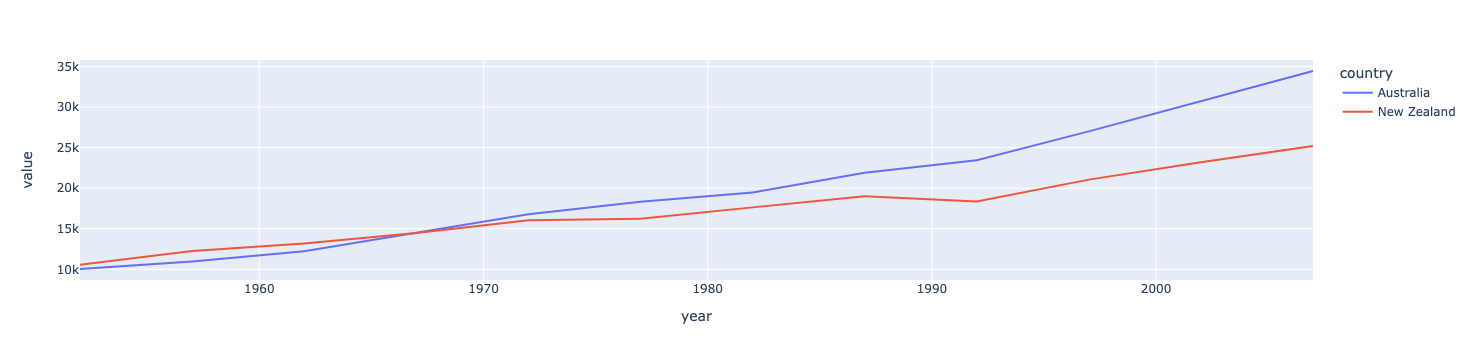

In [110]:
fig = px.line(df_gdp_o, x = "year", y = "value", color = "country")
fig.show()